# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team 21**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # Data processing, CSV file importation

# Libraries for data preparation and model building
##Accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor

from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray

from tqdm import tqdm
import math
import random

#Visualization Packages
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

To load your data, first ensure that the raw data and the notebook file are in the same folder on your local machine. The code below will load both the train and test data set into your notebook. If the files are not in the same folder, you will have to point to the directory in your machine or cloud location where the file is located. After loading your data, it is good practice to call up the loaded data just to verify that the data actually loaded as it should.

In [2]:
# load the train data
train_data = df_train = pd.read_csv('df_train.csv') 
df_train

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [3]:
# Load the test data
test_data = df_test = pd.read_csv('df_test.csv') 
df_test

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Check the "Shape" of the data-sets
Looking at the shape of both datasets, it is clear that the data has been split into 2 sets. 75% of the data is designated as the train data while 25% of the data is designated as the test data. The shape also shows that the training set has 49 columns while the test data set has only 48 coulmns. The missing column from the test set is the column that our model is to predict. We can identify that particular entity by simply identifying the entity(Column) that is missing from the test data set. From examining both datasets, that column can be identified as the load_shortfall_3hr column.

In [4]:
df_train.shape, df_test.shape

((8763, 49), (2920, 48))

### Use the ".column" function to view the columns in your data set;
While the .shape function has revealed the number of columns and rows which exists in your data set the, .columns function lists out the actual names of all the columns that exists in the dataframe. Find above and below the output of the column names of df_train and df_test respectively. 

In [5]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [6]:
df_test.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

### The "describe" function
This function shows the summary statistics of the data. The  count feature shows the values in the represented columns that do not feature any null entries. The mean, Standards dev, minimum, maximum and quantile values are also featured in the summary stats shown by the describe funtion.

In [7]:
# look at data statistics for df_train
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [8]:
# look at data statistics for df_test
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


### The "isnull" function
It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean as this function shows that only the column "Valencia_pressure" features null values.

In [9]:
# Identify colunm(s) that contain null values in df_train
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [10]:
# Identify colunm(s) that contain null values in df_test
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

### Evaluate the correlation between the columns of the dataset
It is neccesary to evaluate the columns to see how the values within the columns correlate. if multiple columns show strong correlation, the correlating columns will have to be removed from the data set before it is used for model creation as these columns may not add any additional functionality or advantage to the model but will only serve to increase it's size and lead to slow performance. a correlation value of 1 represents a perfect positive correlation while a value equal to -1 indicates a perfect negative correlation. The further away the value is from 1 or -1, the weaker the correlation.

In [11]:
# evaluate correlation for df_train
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [12]:
# evaluate correlation for df_test
df_test.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Unnamed: 0,1.000000,-0.235888,-0.171216,-0.229930,-0.012468,-0.032478,-0.192422,-0.136715,-0.089696,-0.135484,...,0.248009,0.242473,0.248321,0.239508,0.262182,0.247846,0.289018,0.272777,0.241640,0.246385
Madrid_wind_speed,-0.235888,1.000000,0.253975,0.577509,-0.107176,-0.055267,0.164097,0.404369,0.166845,0.277087,...,-0.034217,-0.024364,-0.028548,-0.029330,-0.041190,-0.022688,-0.056954,-0.023627,-0.023591,-0.046734
Bilbao_rain_1h,-0.171216,0.253975,1.000000,0.155717,0.103573,0.149643,0.414151,0.118086,0.080647,0.183078,...,-0.207383,-0.223619,-0.202221,-0.221014,-0.239588,-0.196089,-0.258778,-0.233939,-0.218465,-0.217309
Valencia_wind_speed,-0.229930,0.577509,0.155717,1.000000,-0.214738,-0.100565,0.126358,0.423967,0.080878,0.281658,...,-0.003885,-0.004474,-0.001078,0.028977,0.015834,0.001775,-0.003910,0.030320,-0.006542,-0.033857
Seville_humidity,-0.012468,-0.107176,0.103573,-0.214738,1.000000,0.771534,0.033669,-0.172222,0.388829,-0.233416,...,-0.587597,-0.668035,-0.587903,-0.562529,-0.547807,-0.585128,-0.514154,-0.743369,-0.658135,-0.630085
Madrid_humidity,-0.032478,-0.055267,0.149643,-0.100565,0.771534,1.000000,0.005968,-0.043188,0.327895,-0.169288,...,-0.673470,-0.789474,-0.672803,-0.607507,-0.588370,-0.668369,-0.548738,-0.740434,-0.777081,-0.756214
Bilbao_clouds_all,-0.192422,0.164097,0.414151,0.126358,0.033669,0.005968,1.000000,0.001085,0.010232,0.227288,...,-0.075326,-0.102398,-0.071588,-0.128791,-0.167230,-0.067711,-0.215278,-0.132752,-0.104385,-0.108140
Bilbao_wind_speed,-0.136715,0.404369,0.118086,0.423967,-0.172222,-0.043188,0.001085,1.000000,0.138443,0.519614,...,-0.025420,-0.001129,-0.022682,0.078474,0.097111,-0.019624,0.117940,0.060728,-0.004439,-0.030676
Seville_clouds_all,-0.089696,0.166845,0.080647,0.080878,0.388829,0.327895,0.010232,0.138443,1.000000,0.007418,...,-0.166132,-0.208761,-0.158508,-0.126255,-0.123033,-0.150160,-0.114845,-0.170409,-0.206495,-0.213871
Bilbao_wind_deg,-0.135484,0.277087,0.183078,0.281658,-0.233416,-0.169288,0.227288,0.519614,0.007418,1.000000,...,0.112969,0.132334,0.114064,0.157191,0.146133,0.114486,0.124797,0.145157,0.130515,0.112450


In [13]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Merge the data sets
Observe that so far, we have had to repeat each step we take for the Test and the Train data set. We can simplify the work done in EDA, Data cleaning and pre-processing by merging the Test and Train Data-sets. When you merge your data, any action carried out on one set affects the other data set as well, so you can carry out the actions neccesary for data cleaning only once.

In [14]:
# # Merge the test and train data set to simplify your work 
# df_train = pd.concat([df_train, df_test])
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [15]:
df_train.shape

(8763, 49)

### Check for null Values in df_train
What we expect to see is the sum of the null values contained in the df_train and the df_test data frames. We also expect the load_shortfall_3hr data column from the entire df_train data set to return null values. This is consistent with what we get from the merged data set.

In [16]:
df_train.isnull().sum()
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

### Check the tail of the merged dataset
Now let us check out the tail of df_train. We want to check to confirm that the data represented at the tail is consitent with the data we get from the df_test data set. Recall that the lower 25% of df_train is the df_test data.

In [17]:
df_train.tail(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [18]:
df_test.tail(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


### Fix null entries (train)
Looking at the  dataset, everything seems to be in order except the "Valencia_pressure" data set which records 2,522 null entries. Note that the load_shortfall_3h has null entries because it is the value that is to be predicted by the model. After merging the train and  the test data-sets to simplify the work of pre-processing and data cleaning, any action carried out on the merged data set affects bothe the df_train and the df_test data sets as they are both one single dataframe now.So, you can carry out the actions neccesary for data cleaning only once on the merged data set.

c:\Users\Silas_Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

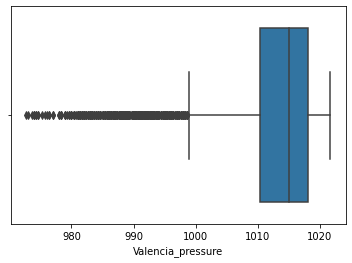

In [19]:
sns.boxplot(df_train['Valencia_pressure'])

In [20]:
print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.0514065222798
Median
1015.0


### Fix null entries (test)
Looking at the  dataset, everything seems to be in order except the "Valencia_pressure" data set which records 2,522 null entries. Note that the load_shortfall_3h has null entries because it is the value that is to be predicted by the model. After merging the train and  the test data-sets to simplify the work of pre-processing and data cleaning, any action carried out on the merged data set affects bothe the df_train and the df_test data sets as they are both one single dataframe now.So, you can carry out the actions neccesary for data cleaning only once on the merged data set.

In [21]:
print('Mode')
print(df_test['Valencia_pressure'].mode())
print('Mean')
print(df_test['Valencia_pressure'].mean())
print('Median')
print(df_test['Valencia_pressure'].median())

Mode
0    1016.0
Name: Valencia_pressure, dtype: float64
Mean
1013.1483509056493
Median
1014.6666666667


### Choosing the value to replace null values
To fix the null value problem, you can choose to either remove the entries with these nulls from your data set or fill in the  the null values by replacing the nulls with the mean, median or mode. It wouldn't really make too much of a difference which entry you choose to go with as these features are actually quite simmilar looking at the measures of centralization of the "Valencia_pressure" from the data set and the box-plot shown above. For the purpose of this model, we shalll go with the last option and fill out the Null values in "Valencia pressure" with the mode.

In [22]:
#Save the cleaned data
df_train = df_train
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mode()[0])

In [23]:
#Save the cleaned data
df_test = df_test
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])

In [24]:
df_train.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [25]:
df_test.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

### Check data types
Now that we have taken care of the null values, we can check to identify the data types contained in the dataset. Machine learning models only work with numeric data, which means the data types for the models must be floats or integers in order to get the best predictions out of the models built from our data.The code bellow reveals the data types of the data contained in our data set. Note that the "time" data, the "Valencia_wind_deg" data as well as the "Seville_pressure" are all object data (also known as strings). These have to be converted to floats or integers for the model to be able to make use of them as inputs. Like the null values, you can handle this problem by simply dropping the colunms. This is not recommended as everytime you drop data, you are loosing pottentially valuable information that may be very useful for your model building efforts. A more beneficial approach will be to process this data by Transforming it to numeric form or encoding it to a form that the model can utilize. 3 non-numeric objects are observed from the df_train data set. they are "time", "Valencia_wind_deg" and "Seville_pressure".

In [26]:
df_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [27]:
df_test.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h            int64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h          int64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

### The time column
Let us take a more thorough look at the object elements in our data frame. We will start with the time column. We need to take that column and map it into a date_time format which is the form that is usable by models

In [28]:
df_train['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
8758    2017-12-31 09:00:00
8759    2017-12-31 12:00:00
8760    2017-12-31 15:00:00
8761    2017-12-31 18:00:00
8762    2017-12-31 21:00:00
Name: time, Length: 8763, dtype: object

In [29]:
df_test['time']

0       2018-01-01 00:00:00
1       2018-01-01 03:00:00
2       2018-01-01 06:00:00
3       2018-01-01 09:00:00
4       2018-01-01 12:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 2920, dtype: object

To convert to datetime, you use the .to_date_time function in the pandas library. Notice that when you output the code to convert the object to .to_date_time, it looks at first glance as though nothing has changed. When you observe the last row though, the data type (dtype) that was represented as an "object" is now represented as "datetime64[ns]". This format is readable by some machine learning models while objects can not be read by any model. Linear regression models fall among the models that cannot read even this time format though. visit https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/ to link to a resource with detailed instruction on how to adapt the date_time data for use by a regression model.

In [30]:
df_train['time'] = pd.to_datetime(df_train['time'])
df_train.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [31]:
df_test['time'] = pd.to_datetime(df_test['time'])
df_test.time

0      2018-01-01 00:00:00
1      2018-01-01 03:00:00
2      2018-01-01 06:00:00
3      2018-01-01 09:00:00
4      2018-01-01 12:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 2920, dtype: datetime64[ns]

In [32]:

from datetime import datetime

From the dataset it seems we will rely hevily on the weather. We can in turn extract the week, time of day and year from the time column as they may be usefull predictors.

### The week column

In [33]:
# df_train['week'] = df_train['time'].apply(lambda x: x.isocalendar()[1])

In [34]:
df_train['hour'] = df_train['time'].apply(lambda x: x.hour)

In [35]:
df_test['hour'] = df_test['time'].apply(lambda x: x.hour)

In [36]:
import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [37]:
add_datepart(df_train, "time", drop=True, time=False)

C:\Users\SILAS_~1\AppData\Local\Temp/ipykernel_25096/4130839075.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [38]:
add_datepart(df_test, "time", drop=True, time=False)

C:\Users\SILAS_~1\AppData\Local\Temp/ipykernel_25096/4130839075.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [39]:
# df_test['week'] = df_test['time'].apply(lambda x: x.isocalendar()[1])

In [40]:
# df_train['week'].unique()

In [41]:
# df_test['week'].unique()

### The time_of_day column

In [42]:
# df_train['hour'].unique()

In [43]:
# df_test['hour'].unique()

### The year column

In [44]:
# df_train['year'] = df_train['time'].apply(lambda x: x.year)

In [45]:
# df_test['year'] = df_test['time'].apply(lambda x: x.year)

In [46]:
# df_train['year'].unique()

In [47]:
# df_test['year'].unique()

### The Quarter column

In [48]:
# df_train['quarter'] = df_train['time'].dt.quarter

In [49]:
# df_test['quarter'] = df_test['time'].dt.quarter

In [50]:
# df_train['quarter'].unique()

In [51]:
# df_test['quarter'].unique()

### The Valencia_wind_deg Column
The next object in the dataset is the "Valencia_wind_deg". This is recorded as levels which are denoted by the string "level" followed by a number which describes that particular level. To encode this, we can simply extract the number from the column that identifies that level. This line of code can help us to achieve that.

In [52]:
df_train['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [53]:
df_test['Valencia_wind_deg']

0        level_8
1        level_8
2        level_7
3        level_7
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 2920, dtype: object

In [54]:
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [55]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg']

0        8
1        8
2        7
3        7
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 2920, dtype: object

As you can see above, the data has been reduced to a number without the string "level" to define it but there is still a problem. The data type is still an object. we can convert the object to numeric form by using the pandas numeric function. 

In [56]:
df_train['Valencia_wind_deg'] = pd.to_numeric(df_train['Valencia_wind_deg'])
df_train.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [57]:
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])
df_test.Valencia_wind_deg

0        8
1        8
2        7
3        7
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 2920, dtype: int64

Repeat the process for Seville_pressure

In [58]:
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)')

In [59]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')

In [60]:
df_train['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: object

In [61]:
df_test['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 2920, dtype: object

In [62]:
df_train['Seville_pressure'] = pd.to_numeric(df_train['Seville_pressure'])
df_train.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [63]:
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])
df_test.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 2920, dtype: int64

### Variable Selection by Correlation and Significance

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [64]:
# Calculate correlations between predictor variables and the response variable
corrs = df_train[df_train['load_shortfall_3h'].notnull()].corr()['load_shortfall_3h'].sort_values(ascending=False)

In [65]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_train[df_train['load_shortfall_3h'].notnull()][col], df_train[df_train['load_shortfall_3h'].notnull()]['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
timeDayofyear,0.205528,0.000000
timeDay,0.092116,0.000000
Valencia_pressure,0.090405,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Seville_humidity,-0.167290,0.000000
Barcelona_rain_1h,-0.056633,0.000000
timeIs_month_start,-0.060294,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000


All the features seem to be statistically significant

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

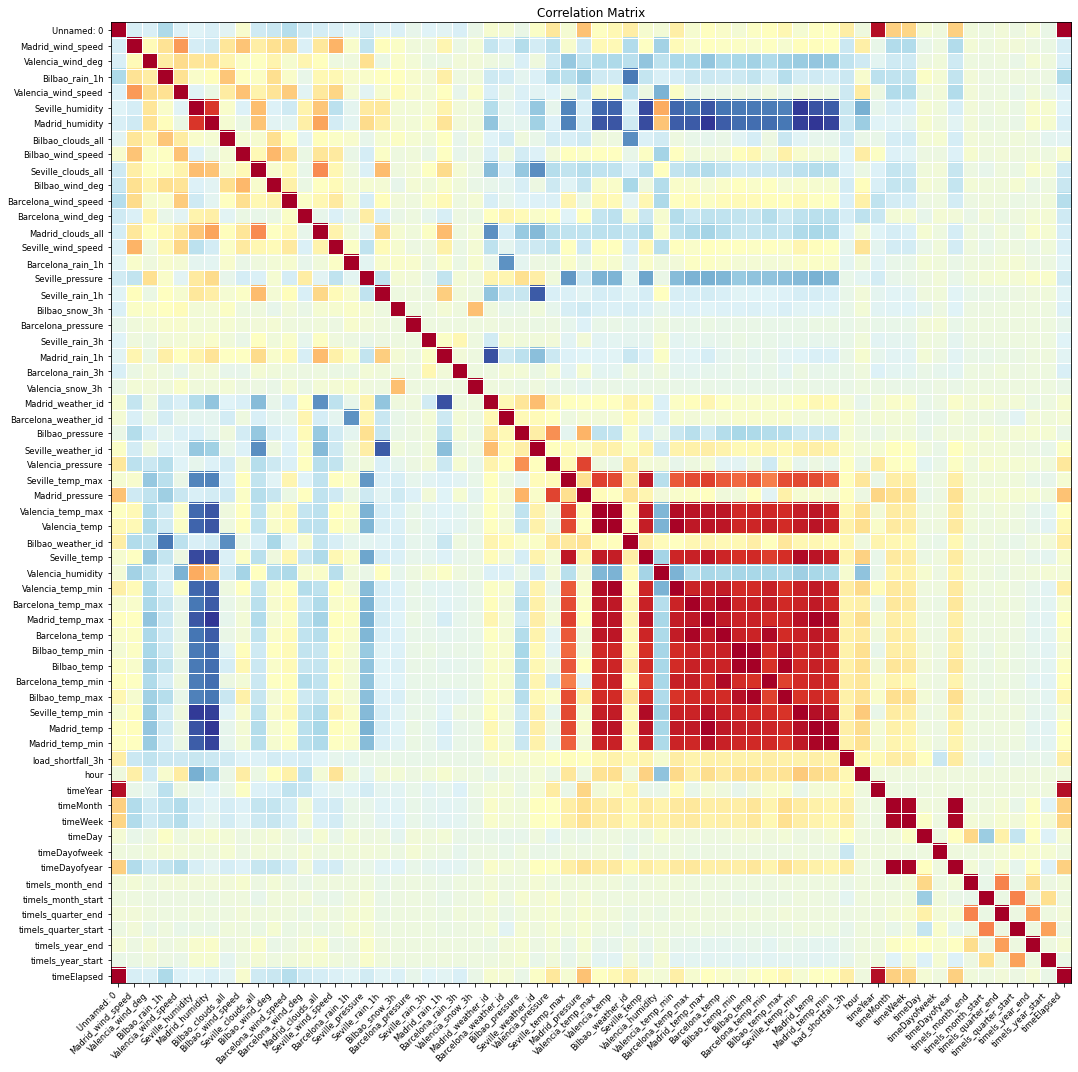

In [66]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

In [67]:
X_names = [col for col in df_train.columns if col != 'load_shortfall_3h']

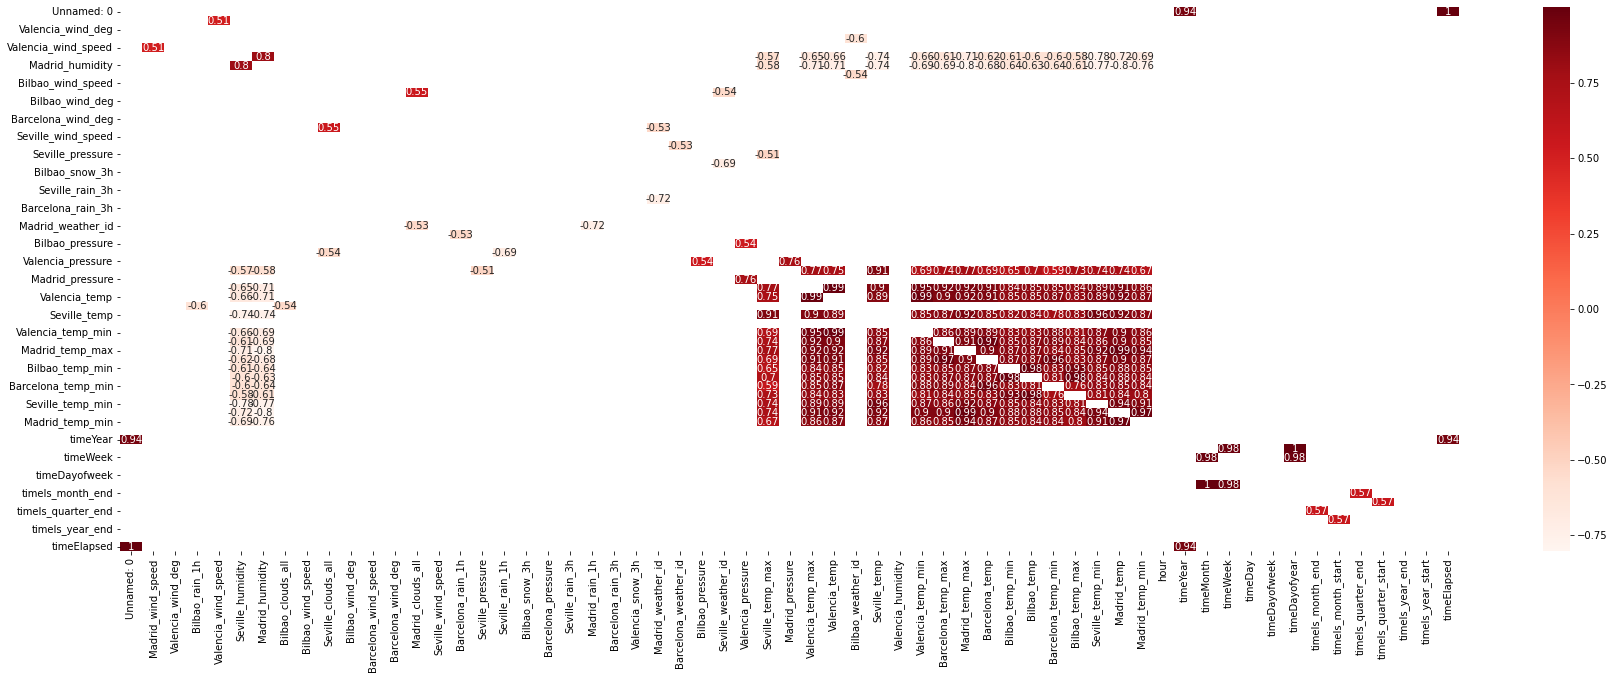

In [68]:
dfCorr = df_train[X_names].corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

From the plot we can see that there are quite a number of variables with high correlation

In [69]:
# get the correlation matrix
corr = df_train[X_names].corr()

# mask away the lower triangle and diagonal
mask = np.triu(np.ones_like(corr),1) == 1

# get the upper triangle (excluding diagonal) by masking and stack:
corr = corr.where(mask).stack()

# 10 largest by absolute values
max10 = corr.abs().nlargest(40)
max10

Unnamed: 0          timeElapsed           1.000000
timeMonth           timeDayofyear         0.996499
Madrid_temp_max     Madrid_temp           0.988871
Valencia_temp_max   Valencia_temp         0.987533
Valencia_temp       Valencia_temp_min     0.985479
Bilbao_temp_min     Bilbao_temp           0.982936
Bilbao_temp         Bilbao_temp_max       0.981624
timeWeek            timeDayofyear         0.977757
timeMonth           timeWeek              0.975848
Barcelona_temp_max  Barcelona_temp        0.974480
Madrid_temp         Madrid_temp_min       0.973641
Barcelona_temp      Barcelona_temp_min    0.964089
Seville_temp        Seville_temp_min      0.955160
Valencia_temp_max   Valencia_temp_min     0.949377
Unnamed: 0          timeYear              0.942808
timeYear            timeElapsed           0.942799
Madrid_temp_max     Madrid_temp_min       0.939147
Seville_temp_min    Madrid_temp           0.939079
Bilbao_temp_min     Bilbao_temp_max       0.932219
Madrid_temp_max     Seville_tem

### Dropping the noise
We need to drop columns that are not useful to the model. For now that would be the "Unnamed:0" and the "time" columns. Note that you can opt to add the time column to your model but that would require encoding the time data untill it is in a form that is usable by the model. We see by running the .head function that the unwanted columns have indeed been dropped from our df. Your data is now clean and ready for use in model building.

### 2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated 

In [70]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
X_names = [col for col in df_train.columns if col != 'load_shortfall_3h']
X = df_train[X_names]
y = df_train['load_shortfall_3h']



In [72]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((7010, 61), (1753, 61))

In [73]:
X_train.corr()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
Unnamed: 0,1.000000,-0.109753,-0.095621,-0.250421,-0.098637,-0.070033,-0.097181,-0.060914,0.044976,-0.145132,...,0.031635,0.004348,0.338383,-0.001328,-0.008331,0.009712,-0.018604,0.030754,-0.035298,1.000000
Madrid_wind_speed,-0.109753,1.000000,0.118827,0.252452,0.523210,-0.119814,-0.137812,0.232736,0.365169,0.187828,...,-0.024250,-0.000179,-0.234871,0.028229,0.003085,0.011226,0.024082,-0.012556,-0.019658,-0.109744
Valencia_wind_deg,-0.095621,0.118827,1.000000,0.202379,0.302057,0.235212,0.252084,0.156599,0.075236,0.081490,...,-0.017855,0.013093,-0.137751,-0.008808,-0.007976,-0.004606,-0.023185,0.030799,0.010490,-0.095642
Bilbao_rain_1h,-0.250421,0.252452,0.202379,1.000000,0.264009,0.071394,0.112659,0.370168,0.076086,0.081738,...,0.070462,0.035530,-0.172854,0.017304,-0.004980,-0.014948,0.001320,-0.006321,-0.011751,-0.250433
Valencia_wind_speed,-0.098637,0.523210,0.302057,0.264009,1.000000,-0.080637,-0.020478,0.205658,0.384166,0.161214,...,-0.005880,0.026492,-0.239251,0.020789,-0.001653,-0.007992,-0.024810,0.009187,-0.025160,-0.098650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
timeIs_quarter_end,0.009712,0.011226,-0.004606,-0.014948,-0.007992,0.002367,-0.015630,-0.007783,0.008398,0.002644,...,0.170624,0.017805,0.040333,0.560702,-0.018721,1.000000,-0.010594,0.469513,-0.005023,0.009714
timeIs_quarter_start,-0.018604,0.024082,-0.023185,0.001320,-0.024810,-0.025414,-0.034333,0.008382,0.010517,-0.024485,...,-0.174621,0.052048,-0.040211,-0.018894,0.565896,-0.010594,1.000000,-0.004974,0.474117,-0.018616
timeIs_year_end,0.030754,-0.012556,0.030799,-0.006321,0.009187,0.051412,0.060056,-0.010654,0.010217,0.051148,...,0.083060,0.042140,0.082689,0.263257,-0.008790,0.469513,-0.004974,1.000000,-0.002358,0.030754
timeIs_year_start,-0.035298,-0.019658,0.010490,-0.011751,-0.025160,0.038019,0.037933,-0.051239,-0.002950,0.020807,...,-0.082791,0.029342,-0.085412,-0.008958,0.268301,-0.005023,0.474117,-0.002358,1.000000,-0.035327


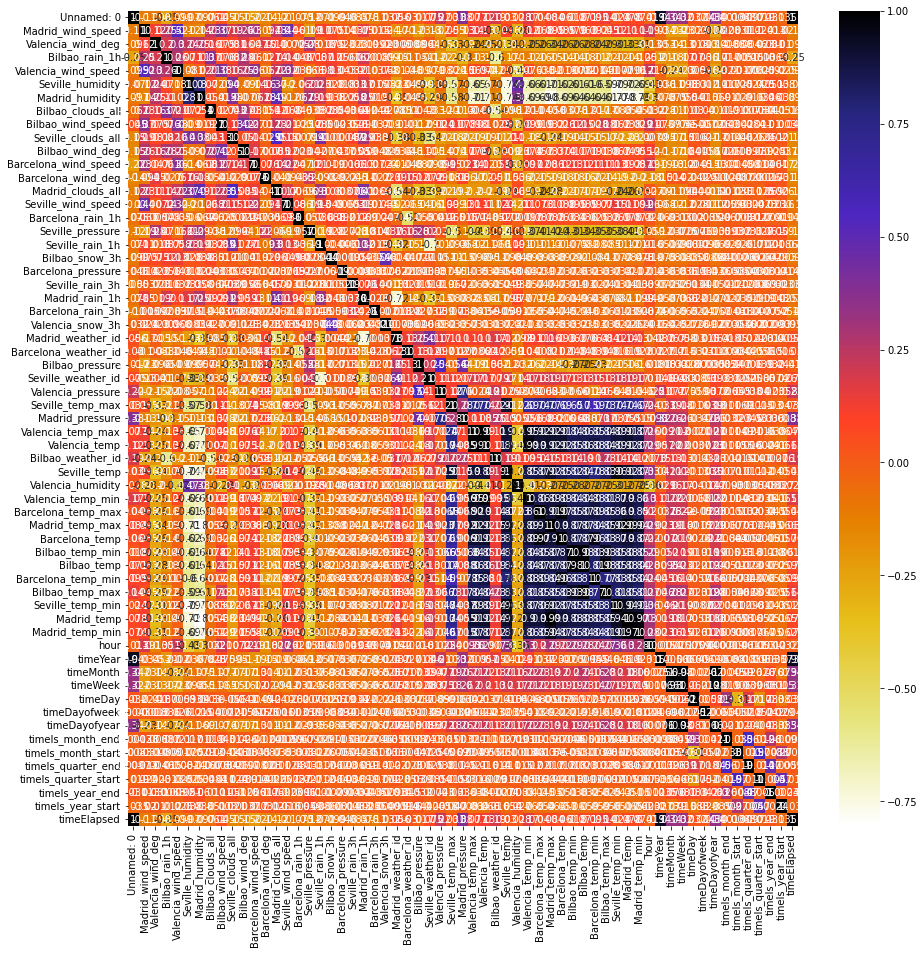

In [74]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [75]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [76]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

17

In [77]:
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min',
 'timeDayofyear',
 'timeElapsed',
 'timeWeek',
 'timeYear'}

In [78]:
# X_train.drop(corr_features,axis=1)
# X_test.drop(corr_features,axis=1)

df_train = df_train.drop(
    ['Unnamed: 0' , 'time', 'year'], axis = 1)

In [79]:
# df_train = df_train.drop(
#     ['Unnamed: 0' , 'Madrid_temp_max', 'Bilbao_temp_max', 'Barcelona_temp_max', 'Valencia_temp_max', 'Seville_temp_max', 
#     'Madrid_temp_min', 'Bilbao_temp_min', 'Barcelona_temp_min', 'Valencia_temp_min', 'Seville_temp_min'], axis = 1)

df_train = df_train.drop(['Unnamed: 0' ,"Barcelona_temp",
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min',
 'timeDayofyear',
 'timeElapsed',
 'timeWeek',
 'timeYear'],axis =1)

In [80]:
# df_test = df_test.drop(
#     ['Unnamed: 0' , 'Madrid_temp_max', 'Bilbao_temp_max', 'Barcelona_temp_max', 'Valencia_temp_max', 'Seville_temp_max', 
#     'Madrid_temp_min', 'Bilbao_temp_min', 'Barcelona_temp_min', 'Valencia_temp_min', 'Seville_temp_min'], axis = 1)
df_test = df_test.drop(['Unnamed: 0' ,"Barcelona_temp",
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min',
 'timeDayofyear',
 'timeElapsed',
 'timeWeek',
 'timeYear'],axis =1)

In [81]:
df_train.shape

(8763, 44)

In [82]:
df_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,hour,timeMonth,timeDay,timeDayofweek,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,3,1,1,3,False,True,False,True,False,True
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,6,1,1,3,False,True,False,True,False,True
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,9,1,1,3,False,True,False,True,False,True
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,12,1,1,3,False,True,False,True,False,True
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,15,1,1,3,False,True,False,True,False,True


### Regularisation

In [83]:
# #Applying it on the data set
# clean_dataset(df_train)

In [84]:
df_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,hour,timeMonth,timeDay,timeDayofweek,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,3,1,1,3,False,True,False,True,False,True
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,6,1,1,3,False,True,False,True,False,True
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,9,1,1,3,False,True,False,True,False,True
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,12,1,1,3,False,True,False,True,False,True
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,15,1,1,3,False,True,False,True,False,True


In [85]:
# Separate the features from the response
X_names = [col for col in df_train.columns if col != 'load_shortfall_3h']
X = df_train[X_names]
y = df_train['load_shortfall_3h']



In [86]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
# lasso=Lasso()
# parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,0.01,1,5,10,20,30,35,40,45,50,55,100]}
# lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

# lasso_regressor.fit(X,y)
# print(lasso_regressor.best_params_)
# print(lasso_regressor.best_score_)

In [87]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [88]:
# Create standardization object
scaler = StandardScaler()

In [89]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X_names)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,hour,timeMonth,timeDay,timeDayofweek,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-1.090901,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-0.654451,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-0.218001,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,0.218449,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,0.654899,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589


In [90]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [91]:
# get the correlation matrix
corr = X_scaled.corr()

# mask away the lower triangle and diagonal
mask = np.triu(np.ones_like(corr),1) == 1

# get the upper triangle (excluding diagonal) by masking and stack:
corr = corr.where(mask).stack()

# 10 largest by absolute values
max10 = corr.abs().nlargest(60)
max10

Seville_humidity      Madrid_humidity         0.799831
Seville_temp_max      Valencia_temp_max       0.771964
Valencia_pressure     Madrid_pressure         0.760375
Madrid_rain_1h        Madrid_weather_id       0.718816
Madrid_humidity       Valencia_temp_max       0.705918
Seville_rain_1h       Seville_weather_id      0.693443
Seville_humidity      Valencia_temp_max       0.650643
Bilbao_rain_1h        Bilbao_weather_id       0.604616
Madrid_humidity       Seville_temp_max        0.576413
timeIs_month_start    timeIs_quarter_start    0.570988
timeIs_month_end      timeIs_quarter_end      0.570919
Seville_humidity      Seville_temp_max        0.566426
Seville_clouds_all    Madrid_clouds_all       0.552414
                      Seville_weather_id      0.537924
Bilbao_pressure       Valencia_pressure       0.537612
Bilbao_clouds_all     Bilbao_weather_id       0.536205
Madrid_clouds_all     Madrid_weather_id       0.533331
Barcelona_rain_1h     Barcelona_weather_id    0.525751
Madrid_win

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Data splitting
Recall that we merged our train and test data sets in order to make cleaning and preprocessing easier. Now that we are ready to build our model, it is time to split this back into the distinct data sets. The code below splits our data into the train and test data sets. 

In [92]:
# split data
y = df_train[:len(df_train)][['load_shortfall_3h']]
x = X_scaled[:len(df_train)]

x_train = df_train[:len(df_train)].drop('load_shortfall_3h',axis=1)

#Ignore for now. Will be used when model is built and ready to be tested
x_test = df_train[len(df_train):].drop('load_shortfall_3h',axis=1) 
# x_test = df_test 

In [93]:
x.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,hour,timeMonth,timeDay,timeDayofweek,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-1.090901,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-0.654451,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-0.218001,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,0.218449,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,0.654899,-1.602429,-1.675368,-0.00274,-0.184343,5.454115,-0.105245,9.552073,-0.052405,19.493589


In [94]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


### Load Your Model
you are now ready to load up your model. For the purpose of this work, we shall be using the most basic type of model, a linear regression model. Note that other models will significantly improve your model performance and you are encouraged to try out other models to see how they perform compared to this one so as to choose the model that performs best. Note that a quick google search will return other models which you may use and applying the model to your data set is as easy as replacing the code in the cell below with the code string that instantiates the model and tweaking the hyperparameters to your taste.

In [95]:

# create a list of base-models
def get_models():
	models = list()
	models.append(XGBRegressor(booster="gbtree",eta=0.2,eval_metric= "rmse", n_estimators=1000))
	models.append(ElasticNet())
	models.append(KNeighborsRegressor())
	models.append(AdaBoostRegressor())
	models.append(BaggingRegressor(n_estimators=300))
	models.append(RandomForestRegressor(n_estimators=10))
	models.append(ExtraTreesRegressor(n_estimators=300))
	return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_y_pred = list()
		# get data
		train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
		train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
		meta_y.extend(test_y.values.ravel())
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y.values.ravel())
			y_pred = model.predict(test_X)
			# store columns
			fold_y_pred.append(y_pred.reshape(len(y_pred),1))
		# store fold y_pred as columns
		meta_X.append(hstack(fold_y_pred))
	return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y.values.ravel())
 
# fit a meta model
def fit_meta_model(X, y):
	model = Lasso(alpha=1e-15)
	model.fit(X, y)
	return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		y_pred = model.predict(X)
		mse = mean_squared_error(y, y_pred)
		print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))
 
# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		y_pred = model.predict(X)
		meta_X.append(y_pred.reshape(len(y_pred),1))
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

### Training your model
The test size represents the proportion of the data that is intended for use as the "Test data", Where test size is set at 0.25, you are simply telling the algorithm to use 75% of the data to train the model and 25% to test the model. This value can be set at any figure that the model builder chooses.  

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=1)
print('Train', x_train.shape, y_train.shape, 'Test', x_test.shape, y_test.shape)

Train (7010, 43) (7010, 1) Test (1753, 43) (1753, 1)


In [97]:
# get models
models = get_models()

In [98]:
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(x_train, y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)

Meta  (7010, 7) (7010,)


In [99]:
# fit base models
fit_base_models(x_train, y_train, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)

c:\Users\Silas_Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+10, tolerance: 1.917e+07
  model = cd_fast.enet_coordinate_descent(


In [100]:
# evaluate base models
evaluate_models(x_test, y_test, models)

XGBRegressor: RMSE 2575.875
ElasticNet: RMSE 4780.898
KNeighborsRegressor: RMSE 4024.723
AdaBoostRegressor: RMSE 4183.817
BaggingRegressor: RMSE 2833.415
RandomForestRegressor: RMSE 3001.663
ExtraTreesRegressor: RMSE 2696.256


In [101]:
# evaluate meta model
y_pred = super_learner_predictions(x_test, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_test, y_pred))))

Super Learner: RMSE 2363.314


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### The Root Mean squared Error (RMSE)
The root mean squared error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the actual values observed. It is a very useful tool in telling how well your model predicted the values in the test data set. Below is a function that calculates the returns the average RMSE of the model 


In [102]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [103]:
rmse(y_test, y_pred)

2363.313665761443

This means that on the average, the predictions of your model deviated from the actual values by about "4858.875754272154". You can better appreciate the implications of this value when you compare it to the mean y_train value, which are the actual values used in training the model. This RMSE value means that a load_shortfall_3h value that is actually 10,000 could possibly have been predicted by your model to be 10,000 +- 4858.875754272154, which implies that your models prediction can be lower than 6000 and can be higher than 14,000. Not too good a performance you might say.

In [104]:
y_train.mean()

load_shortfall_3h    10671.060723
dtype: float64

### The r squared score
Another metric that is useful in assessing model performance is the r squared score. This score is a measure of the percentage of accuracy of your models predictions. We import this metric from sklearn with the code below. The r2_score of our model reveals that our model returns a correct prediction only 13.4% of the time. A rather poor performance again but bear in mind that thios is aa very basic model that has not been optimized in most ways possible.

In [105]:
#This is another model evaluation tool that tells you how well your mode.l performs
from sklearn.metrics import r2_score

In [106]:
r2_score(y_test, y_pred)

0.790981681302067

### How to Improve your Model and Optimize performance
consider taking these steps to generate better models and enhance the performance of your generated models. 
* Better Model: This is  just a basic linear regression model. Use google to find other models
and try them out to see how this can make your model performance ratings to improve.

* Better Features: As you know, we dropped the date_time feature which just might be a very helpful
feature to improve our model performance. Try to get this particular matrix back into your model by perfecting the neccesary steps to encode the "time" data until into a form usable by your model. It will also be helpful to drop highly correlated features from the model.

* Hyper Parameter tuning: All models come with default features that can be edited in relation to the data set
to improve model performance. Be careful in modifying hyper parameters though as this may also have a negative 
impact on the performance of your model.  

* Cross validation: Use cross validation to improve model performance(refer to the cross validation train)

***(Please note that you can and should improve your notebook by including extensive relevant visualizations as a tool for your EDA. Also, this list of recommendations is by no means exhaustive. You at liberty to research and apply other strategies to improve the performance of your model and make your presentation better.)***

### Making a Kaggle submission
After you are done creating your model, you can make a kaggle submission from your models results by following this steps.


In [107]:
#Designate the dataframes to be used for model training and testing
x_train = df_train[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_test

In [108]:
#Fit your models and make your predictions

# fit base models
fit_base_models(x_train, y, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate meta model
preds = super_learner_predictions(x_test, models, meta_model)


c:\Users\Silas_Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+10, tolerance: 1.917e+07
  model = cd_fast.enet_coordinate_descent(


In [109]:
#confirm that your predictions have actually been generated
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,10044.459711
1,5614.611323
2,2435.337907
3,4966.921265
4,7755.554424


In [119]:
test_data = df_test = pd.read_csv('df_test.csv') 
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [111]:
#Run this code to generate a .csv file of your submission
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(daf)
submission.to_csv('submission.csv', index=False)

In [112]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10044.459711
1,2018-01-01 03:00:00,5614.611323
2,2018-01-01 06:00:00,2435.337907
3,2018-01-01 09:00:00,4966.921265
4,2018-01-01 12:00:00,7755.554424
...,...,...
2915,2018-12-31 09:00:00,13352.540736
2916,2018-12-31 12:00:00,16205.528812
2917,2018-12-31 15:00:00,15189.374874
2918,2018-12-31 18:00:00,14538.572200


### The entry submission process
To run a submission on kaggle, all of the steps involved in the creation of your model as stated above should have been completed on Kaggle. Once you are done with the process and your submission file has been generated and you are happy with the results of the process, locate the save version button on the top right corner of the kaggle page. click on save & run all (commit) button that shows up at the center of your screen and finally click on save to save the output. When you click on the code button, you will find a file called out-put. Clicking on this file will reveal your .csv file that has been submitted to kaggle. You can now submit this file as an entry on kaggle or download it if you prefer to.

Alternatively, you can submit by downloading the .csv file, go to the leaderboard, click on submit and upload your submission file from wherever it is saved on you local machine. Your entry will be evaluated immediately and you will be told your score.

***Note that you can run multiple submissions, as many times as you wish before the official closing date of the submission. Each time your entry will be evaluated and told
what your score is.***

In [113]:
# create one or more ML models


In [114]:
# evaluate one or more ML models

In [115]:
# Compare model performance

In [116]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [117]:
# discuss chosen methods logic